# Aplica el agrupamiento jerárquico con este notebook en Python
En este *notebook* aprenderás a ejecutar los métodos de agrupamiento jerárquico aglomerativo en las librerías *PyClustering* y *scikit-learn*. Veremos cómo configurar distintos modos de enlace y cómo obtener el dendrograma para visualizar los resultados.
## 1. Ejecutar el agrupamiento jerárquico aglomerativo en ***PyClustering***
En la primera parte del *notebook* utilizaremos la librería *PyClustering*. En concreto, nos centraremos en el paquete [*agglomerative*](https://pyclustering.github.io/docs/0.8.2/html/d5/d2d/namespacepyclustering_1_1cluster_1_1agglomerative.html), donde se encuentra la implementación del método y de los modos de enlace. Como en notebooks anteriores, primero tenemos que importar los paquetes que necesitaremos:

In [1]:
# La primera vez que se vaya a ejecutar este notebook es necesario instalar la librería pyclustering
from pyclustering.cluster.agglomerative import agglomerative, type_link
from pyclustering.cluster import cluster_visualizer
import numpy as np
import matplotlib.pyplot as plt

Vamos a utilizar el *dataset* Iris para este ejemplo, ya que viene incorporado en la librería. De sus cuatro propiedades numéricas, nos quedaremos con las dos primeras a las que llamaremos *x* e *y*. Las apilamos en una única matrix de datos (datos_xy) y representamos esta muestra bi-dimensional con *matplotlib* para su distribución.

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3

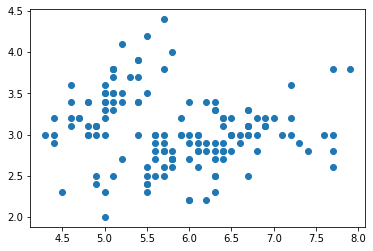

In [2]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
datos = read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
x = [punto[0] for punto in datos]
y = [punto[1] for punto in datos]
datos_xy = np.column_stack((x, y))
print(x)
print(y)
plt.scatter(x, y)
plt.show()

A continuación, podemos configurar el método de agrupamiento jerárquico aglomerativo. Tenemos que especificar el número final de grupos deseado y el método de enlace. En este caso, le pedimos al método que genere 3 grupos mediante el enlace *single*.

In [3]:
num_grupos = 3
tipo_enlace = type_link.SINGLE_LINK
alg_jerarquico = agglomerative(datos_xy, num_grupos, tipo_enlace);

Para ejecutar el análisis de grupos, invocamos a la función *process* como hacíamos con otros métodos de esta misma librería.

In [4]:
alg_jerarquico.process()

Una vez ejecutado el algoritmo, podemos obtener los grupos por medio del método *get_clusters*. Este método nos devuelve un array de 3 elementos donde cada elemento es a su vez un array con el índice de los puntos asignados a ese grupo.

In [5]:
# Devuelve un array de k elementos, donde cada elemento continene el índice de las instancias asignadas al grupo k
grupos = alg_jerarquico.get_clusters()
print(grupos)

[[0, 17, 40, 43, 4, 7, 26, 39, 23, 49, 35, 27, 28, 1, 25, 9, 34, 37, 12, 45, 30, 2, 29, 3, 47, 19, 44, 46, 21, 42, 6, 5, 16, 10, 48, 8, 38, 13, 11, 24, 20, 31, 36, 22, 32, 14, 18, 15, 33, 50, 120, 52, 139, 141, 143, 124, 144, 58, 75, 104, 116, 147, 65, 86, 140, 77, 145, 112, 51, 115, 110, 137, 54, 128, 132, 111, 74, 97, 103, 123, 133, 126, 61, 149, 138, 91, 127, 63, 78, 71, 73, 83, 134, 56, 100, 136, 148, 53, 80, 81, 69, 89, 90, 55, 99, 114, 67, 82, 101, 142, 79, 92, 96, 95, 113, 64, 66, 88, 94, 121, 84, 70, 72, 146, 68, 87, 62, 119, 76, 85, 125, 102, 129, 107, 130, 105, 135, 118, 122, 108, 57, 106, 93, 98, 59, 60, 109], [41], [117, 131]]


Podemos visualizar esta asignación en una gráfica bidimensional utilizando la clase *visualizer*.

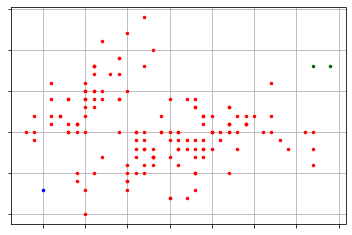

In [6]:
grafico = cluster_visualizer();
grafico.append_clusters(grupos, datos_xy)
grafico.show();

## 2. Cambiar el método de enlace en ***PyClustering***
Tras ver cómo se configura y ejecuta el agrupamiento jerárquico aglomerativo en *PyClustering*, vamos a ver cómo influye el cambio del método de enlace en los resultados. Para ello, creamos diferentes versiones del algoritmo seleccionando otro de los cuatro métodos de enlace disponibles (*complete*, *average* y *centroid*)

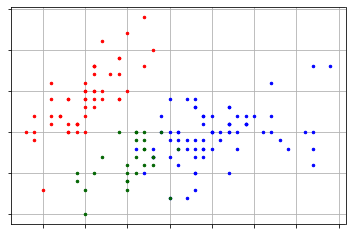

In [7]:
# Complete linkage
alg_jerarquico = agglomerative(datos, num_grupos, type_link.COMPLETE_LINK);
alg_jerarquico.process()
grafico = cluster_visualizer();
grafico.append_clusters(alg_jerarquico.get_clusters(), datos_xy)
grafico.show();

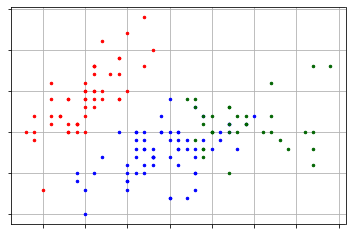

In [8]:
# Average linkage
alg_jerarquico = agglomerative(datos, num_grupos, type_link.AVERAGE_LINK);
alg_jerarquico.process()
grafico = cluster_visualizer();
grafico.append_clusters(alg_jerarquico.get_clusters(), datos_xy)
grafico.show();

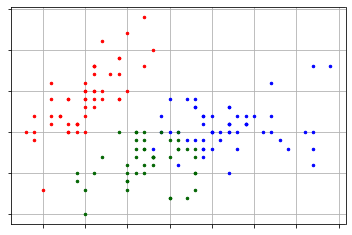

In [9]:
# Centroid linkage
alg_jerarquico = agglomerative(datos, num_grupos, type_link.CENTROID_LINK);
alg_jerarquico.process()
grafico = cluster_visualizer();
grafico.append_clusters(alg_jerarquico.get_clusters(), datos_xy)
grafico.show();

## 3. Ejecutar el agrupamiento jerárquico aglomerativo en ***scikit-learn***
Vamos a utilizar el mismo conjunto de datos (Iris) pero ahora utilizaremos la implementación disponible en [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). Para ello, primero importamos el algoritmo.

In [10]:
from sklearn.cluster import AgglomerativeClustering

Como ya tenemos los datos agrupados del apartado 1, podemos directamente invocar al método con sus parámetros por defecto.

In [11]:
alg_jerarquico_sklearn = AgglomerativeClustering()
alg_jerarquico_sklearn.fit(datos_xy)

AgglomerativeClustering()

En este caso, podemos obtener el número de grupo asignado a cada punto (etiqueta) como para otros métodos de agrupamiento.

In [12]:
etiquetas = alg_jerarquico_sklearn.labels_
print(etiquetas)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


 Además, podemos obtener información más completa si invocamos al método *get_params*, como el método de enlace utilizado y el número de grupos a descubrir.

In [13]:
params = alg_jerarquico_sklearn.get_params(deep=True)
print(params)

{'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'ward', 'memory': None, 'n_clusters': 2}


## 4. Cambiar la configuración en ***scikit-learn***
En *scikit-learn* también podemos cambiar el método de enlace, simplemente asignando el valor del parámetro *linkage*. Como se ha visto en el apartado anterior, el método por defecto es Ward's linkage, pero también podemos utilizar *single*, *complete* y *average*:

In [14]:
# Single linkage
alg_jerarquico_sklearn = AgglomerativeClustering(linkage='single')
alg_jerarquico_sklearn.fit(datos_xy)
etiquetas_single = alg_jerarquico_sklearn.labels_
print(etiquetas_single)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [15]:
# Complete linkage
alg_jerarquico_sklearn = AgglomerativeClustering(linkage='complete')
alg_jerarquico_sklearn.fit(datos_xy)
etiquetas_complete = alg_jerarquico_sklearn.labels_
print(etiquetas_complete)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [16]:
# Average linkage
alg_jerarquico_sklearn = AgglomerativeClustering(linkage='average')
alg_jerarquico_sklearn.fit(datos_xy)
etiquetas_average = alg_jerarquico_sklearn.labels_
print(etiquetas_average)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Para comprobar si estos métodos devuelven diferentes asignaciones, vamos a crear una función que nos cuente cuántos puntos se han asignado a cada grupo. Para ello, le pasamos como parámetro el array de etiquetas devuelvo por cada método.

In [17]:
def frecuencia_etiquetas(etiquetas):
  (valor, frecuencia) = np.unique(etiquetas, return_counts=True)
  tabla_frecuencias = np.asarray((valor, frecuencia)).T
  return tabla_frecuencias

print(frecuencia_etiquetas(etiquetas_single))
print(frecuencia_etiquetas(etiquetas_complete))
print(frecuencia_etiquetas(etiquetas_average))

[[  0 148]
 [  1   2]]
[[  0 138]
 [  1  12]]
[[ 0 94]
 [ 1 56]]


## 5. Visualizar el dendrograma en ***scikit-learn***
El método de agrupamiento jerárquico en *scikit-learn* puede también configurarse para generar el árbol de agrupaciones desde N hasta 1, lo que nos va a permitir también visualizar el resultado en forma de dendrograma.

Si queremos que el método no restringa el número de grupos final, sino que lo vaya decrementando progresivamente, tenemos que usar la siguiente configuración:

In [18]:
alg_jerarquico_sklearn = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
modelo_agrupamiento = alg_jerarquico_sklearn.fit(datos_xy)

A continuación, vamos a incluir la función de construcción del dendrograma que nos proporciona este [script](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py) de *scikit-learn* y que utiliza la función [***dendrogram***](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) de *scipy*.

In [19]:
# Original source code: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Ya podemos invocar a esta función para visualizar el dendrograma con los resultados obtenidos por el método de agrupamiento jerárquico. El parámetro *p* nos permite configurar el número de niveles (empezando por la unión más general) que queremos visualizar. Si este número es menor al número total de niveles, en los nodos hoja veremos entre paréntesis cuántos puntos hay en ese grupo. 

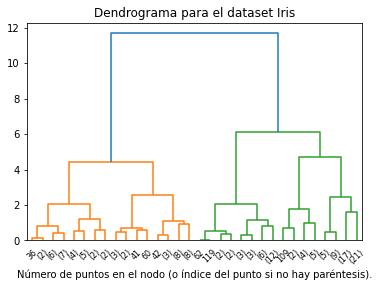

In [20]:
plt.title("Dendrograma para el dataset Iris")
# plot the top three levels of the dendrogram
plot_dendrogram(modelo_agrupamiento, truncate_mode="level", p=4)
plt.xlabel("Número de puntos en el nodo (o índice del punto si no hay paréntesis).")
plt.show()